# Image processing - Practice4.Histogram Processing (Histogram matching)

Made by Prof. Hwan-ho Cho.

Department of Electronics Engineering, Incheon National University

hwanho@inu.ac.kr

---


# 1. Image load & visualization

1) 필요한 Libary load

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

2) 이미지 로드

* 미리 github에 올려놓은 이미지 파일 활용

* 사용 사능한 이미지:
> tire.tif, cell.tif, coins.png, eight.tif, lena_gray.jpeg, moon.tif, cameraman.tif



In [2]:
image = imread('https://github.com/Hwan-ho/ImageProcPractice/raw/main/Dataset/imdata/cameraman.tif')

(-0.5, 255.5, 255.5, -0.5)

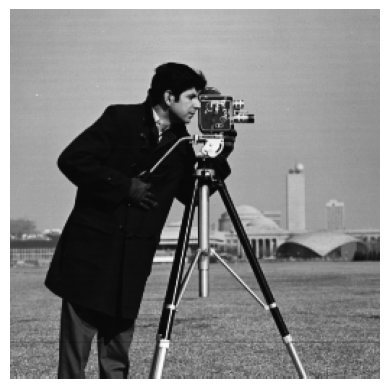

In [3]:
plt.imshow(image, cmap='gray', vmin=0, vmax=255) # vmin, vmax = dynamic range
plt.axis('off')

# 2. Draw histogram

1) 히스토그램 계산

numpy.histgoram()

> Notes
> 
> All but the last (righthand-most) bin is half-open. In other words, if bins is:
> 
> [1, 2, 3, 4]
>
> then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.

In [4]:
[counts, binEdges] = np.histogram(image.reshape(-1,),bins=np.arange(0,257))

2) PDF로 취급할 수 있도록 히스토그램 normalize

In [5]:
PDF = counts.astype('float')
PDF /= PDF.sum() # Histogram normalization

3) Normalized histogram plot

<BarContainer object of 256 artists>

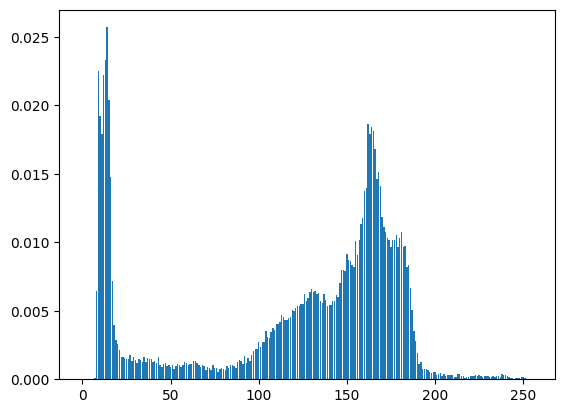

In [6]:
plt.bar(np.arange(0,256),PDF)

# 3. Calculate CDF - $T(r)$

1) CDF calculation

In [7]:
CDF = np.zeros((256,))
CDF[0] = PDF[0]
i = 1
while i < 256:
  CDF[i] = CDF[i-1] + PDF[i]
  i += 1

2) Plot CDF

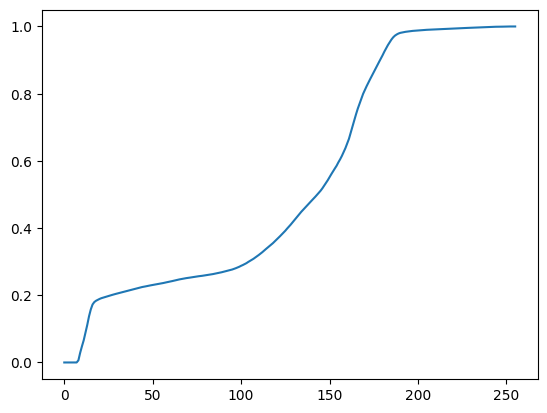

In [8]:
plt.plot(CDF)

In [9]:
Tr = np.round(255*CDF[np.arange(0,256)]).astype('int')
print(Tr)

[  0   0   0   0   0   0   0   0   2   7  12  17  23  28  35  40  44  46
  47  48  48  49  49  50  50  50  51  51  52  52  52  53  53  53  54  54
  54  55  55  56  56  56  57  57  57  57  58  58  58  59  59  59  59  60
  60  60  60  61  61  61  61  62  62  62  63  63  63  64  64  64  64  64
  65  65  65  65  65  66  66  66  66  66  67  67  67  67  68  68  68  68
  69  69  70  70  70  71  71  72  72  73  73  74  75  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  91  92  93  94  96  97  99 100
 102 103 105 106 108 109 111 113 114 116 117 119 120 122 123 124 126 127
 129 130 132 134 136 138 141 143 145 147 149 152 154 157 160 163 166 170
 174 179 184 188 193 196 200 204 207 210 212 215 218 220 223 225 228 230
 233 236 238 241 243 245 247 248 249 250 250 250 251 251 251 251 252 252
 252 252 252 252 252 252 252 252 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 254 254 254 254 254 254 254 254 254 254 254 254
 254 254 254 254 254 255 255 255 255 255 255 255 25

# 4. Define $G(z)$

1) Gaussian noise image generation (Target image)

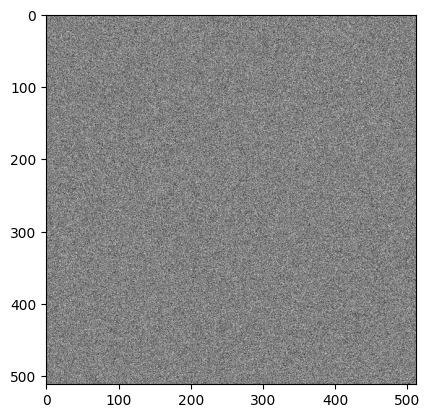

In [10]:
randImage = np.random.normal(0,1,(512,512))
randImage -= randImage.min()
randImage /= randImage.max()
randImage *= 255
randImage = randImage.astype('int')
plt.imshow(randImage, cmap='gray')

2) Caculate histogram

In [33]:
[randCounts, binEdges] = np.histogram(randImage.reshape(-1,),bins=np.arange(0,257))

3) PDF of random image

<BarContainer object of 256 artists>

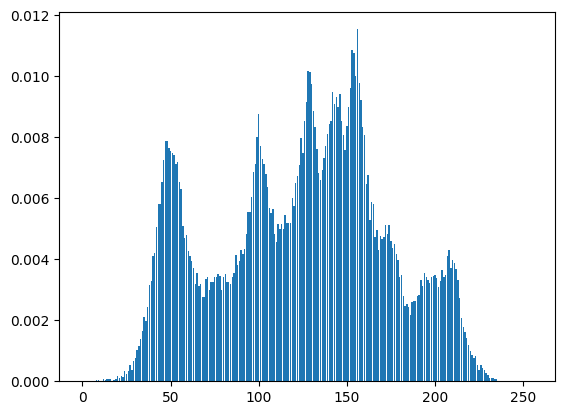

In [34]:
randPDF = randCounts.astype('float')
randPDF /= randPDF.sum() # Histogram normalization
plt.bar(np.arange(0,256),randPDF)

4) CDF of random image

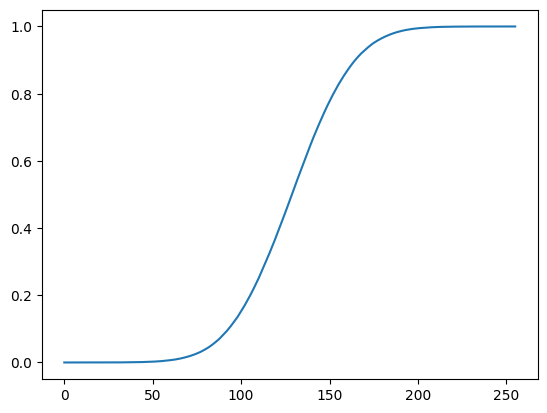

In [13]:
randCDF = np.zeros((256,))
randCDF[0] = randPDF[0]
i = 1
while i < 256:
  randCDF[i] = randCDF[i-1] + randPDF[i]
  i += 1

plt.plot(randCDF)

5) Define $G^{-1}(z) $

In [14]:
Gz = np.round(255*randCDF[np.arange(0,256)]).astype('int')
print(Gz)
Ginv = np.zeros((256,)).astype('int')
i = 0
while i < 256:
  Ginv[Gz[i]] = i
  i += 1
i = 1
while i < 256:
  if Ginv[i] == 0:
    Ginv[i] = Ginv[i-1]
  i += 1
print(Ginv)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1   1
   1   1   1   1   1   2   2   2   2   2   3   3   3   3   4   4   4   5
   5   6   6   7   7   8   9   9  10  11  12  13  14  15  16  17  18  20
  21  23  24  26  27  29  31  33  35  37  39  41  43  46  48  51  53  56
  59  61  64  67  70  73  76  80  83  86  89  93  96 100 103 107 110 114
 117 121 125 128 132 136 139 143 147 150 154 157 161 164 168 171 174 178
 181 184 187 190 193 195 198 201 203 206 208 211 213 215 217 219 221 223
 225 227 229 230 232 233 235 236 237 238 239 241 242 243 243 244 245 246
 246 247 248 248 249 249 250 250 251 251 251 252 252 252 253 253 253 253
 253 254 254 254 254 254 254 254 254 254 254 254 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

# 4. Histogram maching 적용

1) Numpy의 Fancy indexing 이용하여 적용

In [15]:
newImage = Ginv[Tr[image]]

2) 결과 확인

(-0.5, 255.5, 255.5, -0.5)

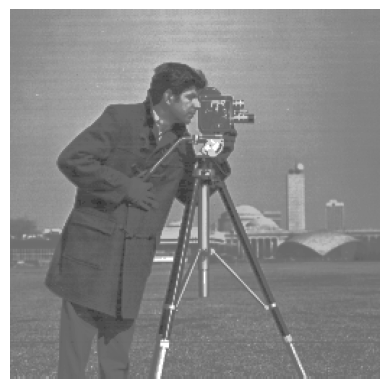

In [16]:
plt.imshow(newImage, cmap='gray', vmin=0, vmax=255) # vmin, vmax = dynamic range
plt.axis('off')

3) 새로운 이미지의 히스토그램 계산

In [19]:
[newCounts, binEdges] = np.histogram(newImage.reshape(-1,),bins=np.arange(0,257))

4) 새로운 이미지의 PDF 계산

In [20]:
newPDF = newCounts.astype('float')
newPDF /= newPDF.sum() # Histogram normalization

5) 새로운 이미지의 PDF 확인

<BarContainer object of 256 artists>

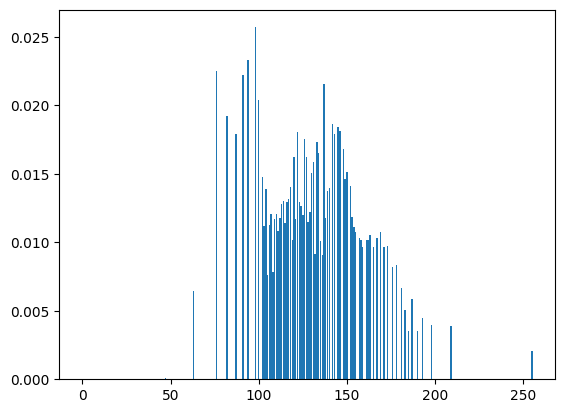

In [21]:
plt.bar(np.arange(0,256),newPDF)

6) 새로운 이미지의 CDF확인

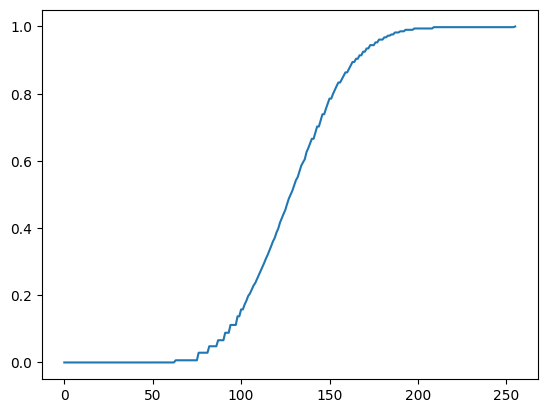

In [22]:
newCDF = np.zeros((256,))
newCDF[0] = newPDF[0]
i = 1
while i < 256:
  newCDF[i] = newCDF[i-1] + newPDF[i]
  i += 1

plt.plot(newCDF)

# 5. 전체 결과 확인

<BarContainer object of 256 artists>

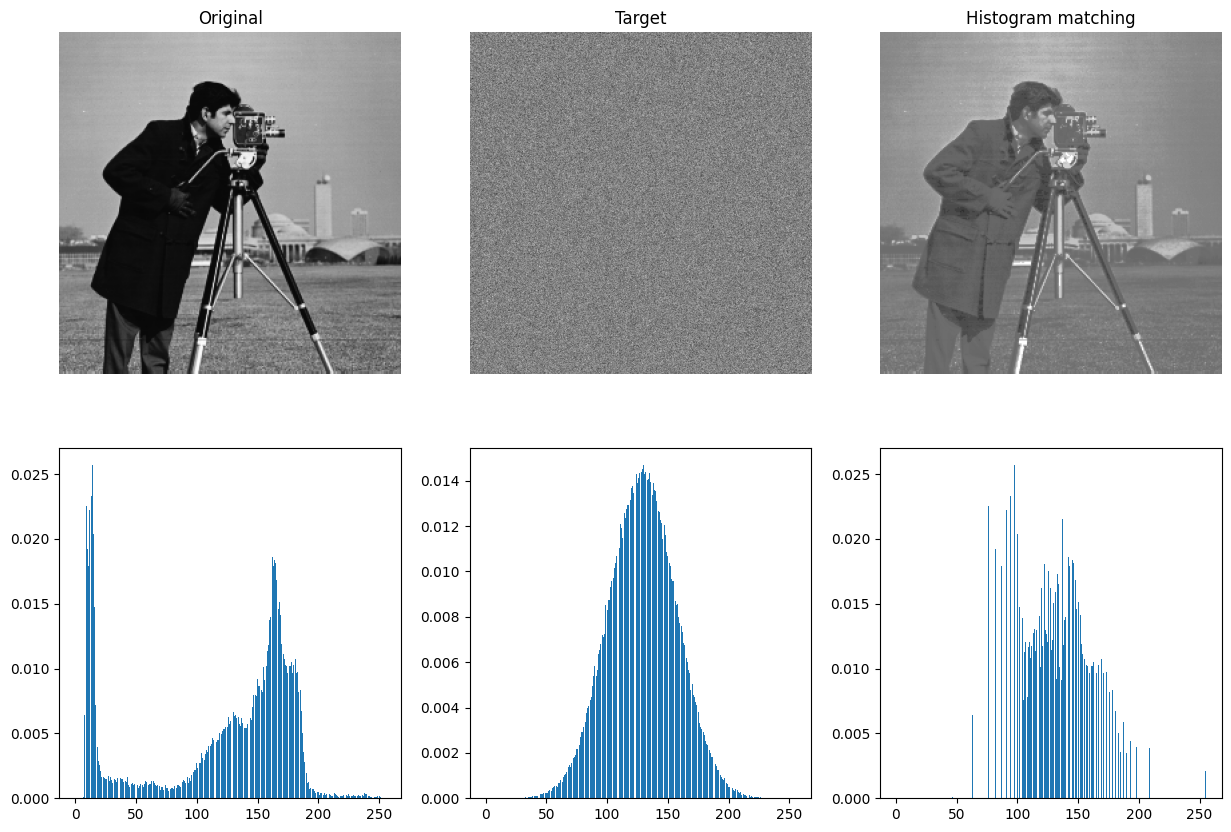

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original')

plt.subplot(2,3,2)
plt.imshow(randImage, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('Target')

plt.subplot(2,3,3)
plt.imshow(newImage, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('Histogram matching')

plt.subplot(2,3,4)
plt.bar(np.arange(0,256),PDF)

plt.subplot(2,3,5)
plt.bar(np.arange(0,256),randPDF)

plt.subplot(2,3,6)
plt.bar(np.arange(0,256),newPDF)

# 6. sci-kit image 라이브러리 활용

In [30]:
from skimage import exposure

randImage = imread('https://github.com/Hwan-ho/ImageProcPractice/raw/main/Dataset/imdata/lena_gray.jpeg')
image = imread('https://github.com/Hwan-ho/ImageProcPractice/raw/main/Dataset/imdata/cameraman.tif')

imageMatch = exposure.match_histograms(image/255,randImage/255)

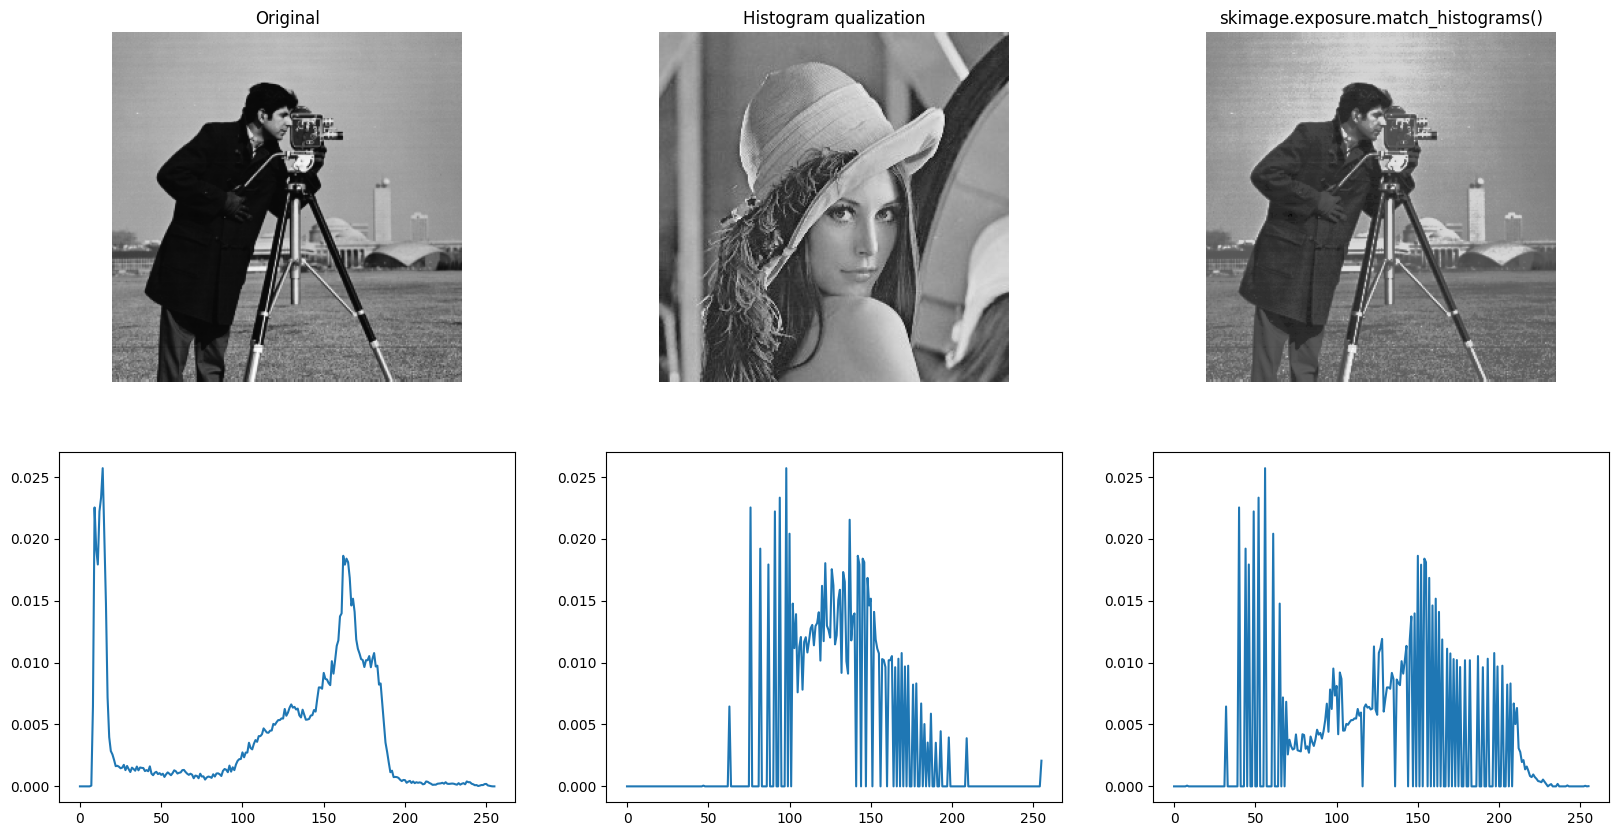

In [32]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original')

plt.subplot(2,3,2)
plt.imshow(randImage, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('Histogram qualization')

plt.subplot(2,3,3)
plt.imshow(255*imageMatch, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('skimage.exposure.match_histograms()')

plt.subplot(2,3,4)
plt.plot(np.arange(0,256),PDF)

plt.subplot(2,3,5)
plt.plot(np.arange(0,256),newPDF)

[eqCounts, binEdges] = np.histogram(255*imageMatch.reshape(-1,),bins=np.arange(0,257))
eqPDF = eqCounts.astype('float')
eqPDF /= eqPDF.sum() # Histogram normalization
plt.subplot(2,3,6)
plt.plot(np.arange(0,256),eqPDF)

In [ ]:
imageMatch.min()

0.0407843137254902

<BarContainer object of 256 artists>

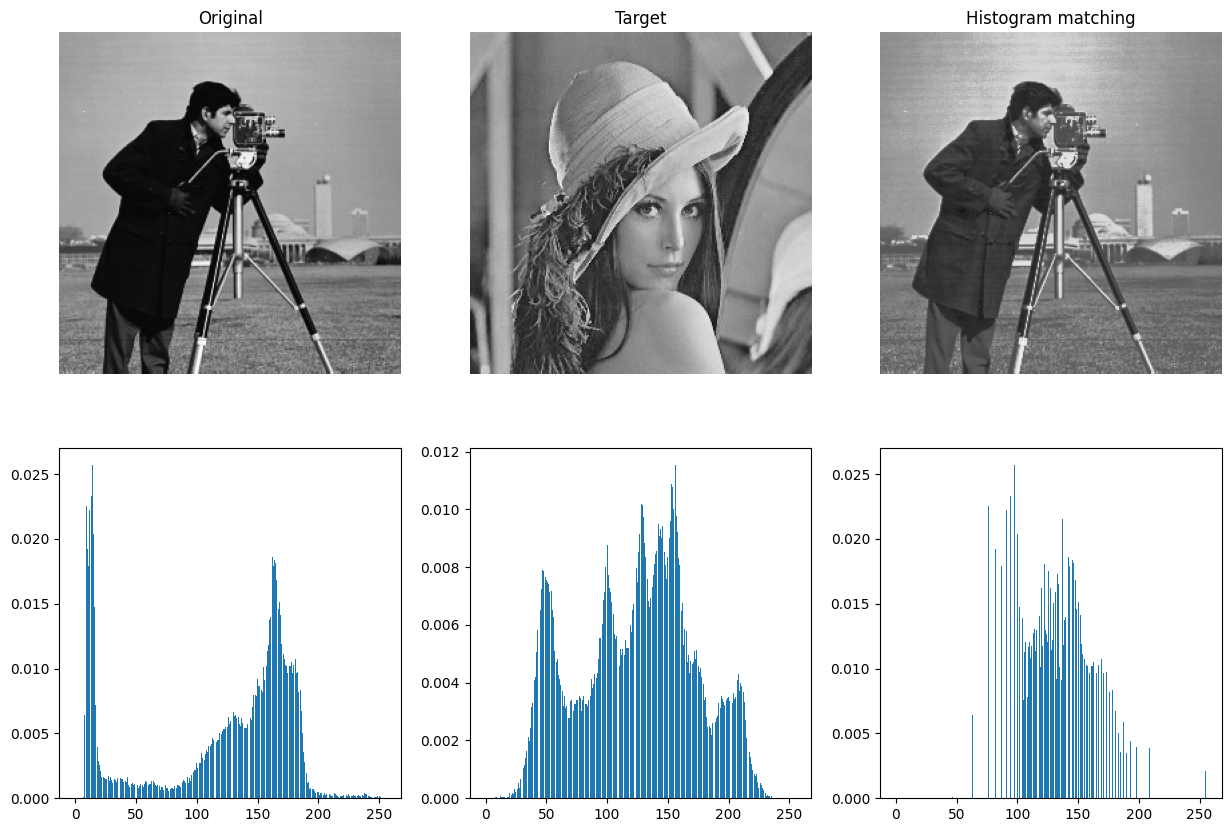

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original')

plt.subplot(2,3,2)
plt.imshow(randImage, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('Target')

plt.subplot(2,3,3)
plt.imshow(255*imageMatch, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('Histogram matching')

plt.subplot(2,3,4)
plt.bar(np.arange(0,256),PDF)

plt.subplot(2,3,5)
plt.bar(np.arange(0,256),randPDF)

plt.subplot(2,3,6)
plt.bar(np.arange(0,256),newPDF)